In [1]:
import pandas as pd
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
features = ['Average Cost for two','Price range','Votes']
x = df[features]
y = df['Aggregate rating']

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [9]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
r2_score(y_test, y_pred_rf)

0.9364010746918662

In [23]:
r2_score(y_test, y_pred_dt)

0.9103071001500397

In [24]:
r2_score(y_test, y_pred_lr)

0.22678120947295177

### Model Performance Comparison
The Random Forest Regressor achieved the highest R² score (0.93), indicating strong predictive performance and the ability to capture non-linear relationships in the data. The Decision Tree model also performed well, while Linear Regression showed limited effectiveness due to its assumption of linearity. Overall, ensemble-based models proved more suitable for predicting restaurant ratings.

In [25]:
mean_squared_error(y_test, y_pred_rf)

0.1447580856678647

In [26]:
mean_squared_error(y_test, y_pred_dt)

0.20415081571542287

In [27]:
mean_squared_error(y_test, y_pred_lr)

1.7599302405948398

### Error Analysis
The Random Forest model achieved the lowest Mean Squared Error, indicating minimal prediction error compared to other models. The Decision Tree model showed slightly higher error, while Linear Regression had the highest MSE, reflecting its inability to capture complex patterns in the data. These results further confirm that ensemble-based models are more effective for predicting restaurant ratings.

In [30]:
cuisine_df = df.assign(Cuisine=df['Cuisines'].str.split(', ')).explode('Cuisine')
avg_rating_cuisine = (
    cuisine_df.groupby('Cuisine')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
)

avg_rating_cuisine.head(10)

Cuisine
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
D�_ner        4.400000
Bubble Tea    4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64

In [31]:
popular_cuisines = (
    cuisine_df.groupby('Cuisine')['Votes']
    .sum()
    .sort_values(ascending=False)
)

popular_cuisines.head(10)

Cuisine
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64

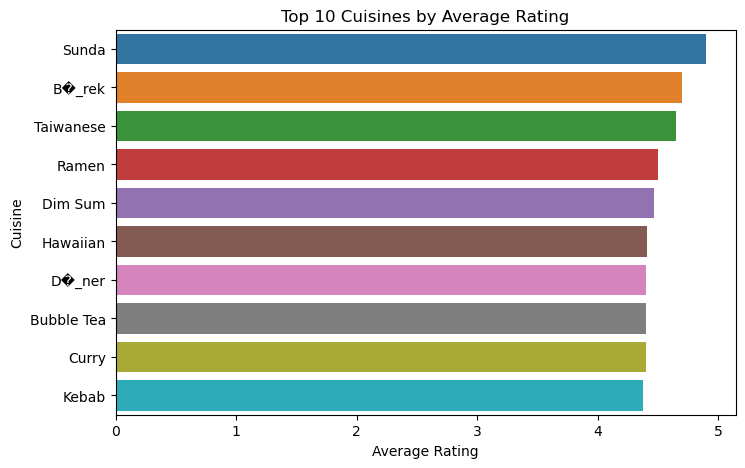

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
top_rated = avg_rating_cuisine.head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_rated.values, y=top_rated.index)
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()